# Trial 5

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Membaca dataset
df = pd.read_csv("/content/drive/MyDrive/Capstone/dataset.csv")

In [2]:
df.count()

RecipeId                 22717
Name                     22717
CookTime                 22717
PrepTime                 22717
TotalTime                22717
RecipeIngredientParts    22717
Calories                 22717
FatContent               22717
SaturatedFatContent      22717
CholesterolContent       22717
SodiumContent            22717
CarbohydrateContent      22717
FiberContent             22717
SugarContent             22717
ProteinContent           22717
RecipeInstructions       22717
ImageUrl                 22717
dtype: int64

In [3]:
df = df[:8000]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecipeId               8000 non-null   int64  
 1   Name                   8000 non-null   object 
 2   CookTime               8000 non-null   object 
 3   PrepTime               8000 non-null   object 
 4   TotalTime              8000 non-null   object 
 5   RecipeIngredientParts  8000 non-null   object 
 6   Calories               8000 non-null   float64
 7   FatContent             8000 non-null   float64
 8   SaturatedFatContent    8000 non-null   float64
 9   CholesterolContent     8000 non-null   float64
 10  SodiumContent          8000 non-null   float64
 11  CarbohydrateContent    8000 non-null   float64
 12  FiberContent           8000 non-null   float64
 13  SugarContent           8000 non-null   float64
 14  ProteinContent         8000 non-null   float64
 15  Reci

In [5]:
df.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,ImageUrl
0,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc...",https://encrypted-tbn0.gstatic.com/images?q=tb...
1,64,Almond Pound Cake,PT1H,PT15M,PT1H15M,"c(""butter"", ""almond paste"", ""sugar"", ""eggs"", ""...",408.5,17.9,9.0,118.9,159.4,56.0,1.3,29.0,6.9,"c(""Preheat oven to 350 degrees Fahrenheit."", ""...",https://encrypted-tbn0.gstatic.com/images?q=tb...
2,94,Blueberry Buttertarts,PT25M,PT15M,PT40M,"c(""egg"", ""corn syrup"", ""lemon juice"", ""vanilla...",337.9,18.4,4.7,17.6,125.7,40.2,1.2,11.5,4.2,"c(""Preheat oven to 375F."", ""Leave shells in fo...",https://encrypted-tbn0.gstatic.com/images?q=tb...
3,131,Buttermilk-Oat Bread,PT20M,PT30M,PT50M,"c(""buttermilk"", ""honey"", ""butter"", ""margarine""...",68.7,0.7,0.3,1.4,88.4,13.3,0.6,1.7,2.1,"c(""For toasted rolled oats, place oats in a sh...",https://encrypted-tbn0.gstatic.com/images?q=tb...
4,168,Anzac Biscuits,PT15M,PT10M,PT25M,"c(""rolled oats"", ""plain flour"", ""sugar"", ""gold...",199.4,10.4,6.8,22.3,143.4,25.0,1.5,10.9,2.2,"c(""Mix oats, flour, sugar and coconut together...",https://encrypted-tbn0.gstatic.com/images?q=tb...


In [6]:
# Mengambil fitur yang diperlukan
features = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent','SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']
data = df[features]

# Menormalkan data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [9]:
# Memisahkan fitur dan target
X = data_scaled
y = df['RecipeId']

# Membagi data menjadi data latih dan data uji
train_data, test_data = train_test_split(data_scaled, train_size=0.7, random_state=1)

In [15]:
import tensorflow as tf

# Membangun Model Architecture
num_features = train_data.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(num_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_features, activation='softmax')
])

# Compile and Train Model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

model.fit(train_data, train_data, epochs=100)

Epoch 1/100
175/175 [==============================] - 4s 7ms/step - loss: 0.0271 - accuracy: 0.4948
Epoch 2/100
175/175 [==============================] - 1s 7ms/step - loss: 0.0190 - accuracy: 0.6438
Epoch 3/100
175/175 [==============================] - 1s 4ms/step - loss: 0.0168 - accuracy: 0.7411
Epoch 4/100
175/175 [==============================] - 1s 3ms/step - loss: 0.0159 - accuracy: 0.7757
Epoch 5/100
175/175 [==============================] - 1s 4ms/step - loss: 0.0153 - accuracy: 0.7796
Epoch 6/100
175/175 [==============================] - 1s 3ms/step - loss: 0.0149 - accuracy: 0.7948
Epoch 7/100
175/175 [==============================] - 1s 4ms/step - loss: 0.0146 - accuracy: 0.7984
Epoch 8/100
175/175 [==============================] - 1s 4ms/step - loss: 0.0144 - accuracy: 0.8071
Epoch 9/100
175/175 [==============================] - 1s 4ms/step - loss: 0.0143 - accuracy: 0.8016
Epoch 10/100
175/175 [==============================] - 1s 3ms/step - loss: 0.0141 - accura

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               2560      
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 9)                

In [19]:
# Melatih model dengan data latih dan mengukur validation loss
history = model.fit(train_data, train_data, validation_data=(test_data, test_data), epochs=50)
val_loss = history.history['val_loss']

Epoch 1/50
175/175 [==============================] - 2s 10ms/step - loss: 0.0123 - accuracy: 0.8695 - val_loss: 0.0121 - val_accuracy: 0.9267
Epoch 2/50
175/175 [==============================] - 2s 10ms/step - loss: 0.0123 - accuracy: 0.8612 - val_loss: 0.0121 - val_accuracy: 0.9246
Epoch 3/50
175/175 [==============================] - 3s 19ms/step - loss: 0.0123 - accuracy: 0.8679 - val_loss: 0.0122 - val_accuracy: 0.9179
Epoch 4/50
175/175 [==============================] - 4s 23ms/step - loss: 0.0122 - accuracy: 0.8677 - val_loss: 0.0122 - val_accuracy: 0.9158
Epoch 5/50
175/175 [==============================] - 3s 14ms/step - loss: 0.0123 - accuracy: 0.8680 - val_loss: 0.0122 - val_accuracy: 0.9154
Epoch 6/50
175/175 [==============================] - 2s 9ms/step - loss: 0.0122 - accuracy: 0.8689 - val_loss: 0.0121 - val_accuracy: 0.9267
Epoch 7/50
175/175 [==============================] - 1s 5ms/step - loss: 0.0122 - accuracy: 0.8689 - val_loss: 0.0121 - val_accuracy: 0.9229
E

<function matplotlib.pyplot.show(close=None, block=None)>

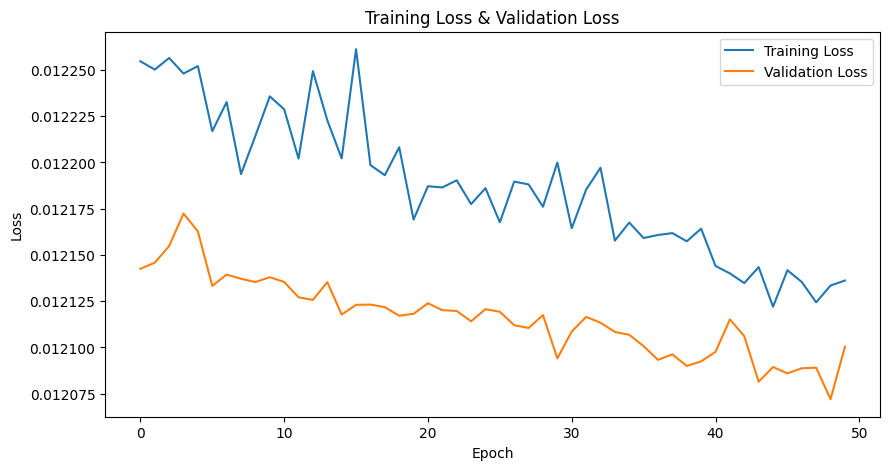

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show

In [21]:
# Generate Recommendations

# Get the latent representation of the input data
latent_features = model.predict(data)

# Calculate cosine similarity between each pair of latent features
similarity_matrix = np.dot(latent_features, latent_features.T)
norms = np.linalg.norm(latent_features, axis=1, keepdims=True)
similarity_matrix /= np.dot(norms, norms.T)

250/250 [==============================] - 1s 2ms/step


In [ ]:
latent_features.shape

(2000, 9)

In [22]:
# Generate recommendations for each item

recommendations = {}
for i in range(len(data)):
    similar_indices = similarity_matrix[i].argsort()[::-1]  # Sort similarity in descending order
    similar_items = [(similarity_matrix[i][j], j) for j in similar_indices if j != i]  # Exclude the item itself
    recommendations[i] = similar_items

In [23]:
len(recommendations)

8000

In [25]:
#Make recommendations

def calculate_bmr(gender, weight, height, age):
    """
    Calculate basal metabolic rate (BMR) based on gender, weight, height, and age.
    
    Args:
        gender (str): Gender of the individual ('male' or 'female').
        weight (float): Weight of the individual in kilograms.
        height (float): Height of the individual in centimeters.
        age (int): Age of the individual in years.
        
    Return:
        float: Basal metabolic rate (BMR) value.
    """
    if gender == 'male':
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    elif gender == 'female':
        bmr = 10 * weight + 6.25 * height - 5 * age - 161
    else:
        raise ValueError("Invalid gender. Please choose 'male' or 'female'.")
    return bmr

def calculate_total_calories(bmr, activity_level, target):
    """
    Calculate total daily calories based on basal metabolic rate (BMR), activity level, and target.
    
    Args:
        bmr (float): Basal metabolic rate (BMR) value.
        activity_level (str): Activity level of the individual ('easy', 'medium', 'hard', 'extreme').
        target (str): Target of the individual ('reduce_weight', 'increase_muscle', 'be_healthy').
        
    Return:
        int: Total daily calories value.
    """
    activity_levels = {
        'easy': 1.375,
        'medium': 1.55,
        'hard': 1.725,
        'extreme': 1.9
    }
    targets = {
        'reduce_weight': 0.8,
        'increase_muscle': 1.2,
        'be_healthy': 1
    }
    maintain_calories = bmr * activity_levels[activity_level]
    total_calories = maintain_calories * targets[target]
    return round(total_calories)

def recommend_food(gender, weight, height, age, activity_level, target):
    """
    Make food recommendations based on user information and preferences.
    
    Args:
        gender (str): Gender of the user ('male' or 'female').
        weight (float): Weight of the user in kilograms.
        height (float): Height of the user in centimeters.
        age (int): Age of the user in years.
        activity_level (str): Activity level of the user ('easy', 'medium', 'hard', 'extreme').
        target (str): Target of the user ('reduce_weight', 'increase_muscle', 'be_healthy').
        
    Return:
        list: Recommended food based on the user's preferences.
    """
    bmr = calculate_bmr(gender, weight, height, age)
    total_calories = calculate_total_calories(bmr, activity_level, target)

    # Make predictions for a new user
    user_input = np.array([[total_calories, 0, 0, 0, 0, 0, 0, 0, 0]])  # Example user with desired total calories
    scaled_user = scaler.transform(user_input)
    predictions = model.predict(scaled_user)

    # Mencari indeks dengan nilai maksimum dalam predictions
    max_index = np.argmax(predictions.flatten())

    # Mencari nilai yang bersesuaian dengan indeks dalam recommendations
    indices = np.array(recommendations[max_index])

    # Get recommended recipes based on matching values
    recommended_food = df.iloc[indices[:, 1].astype(int)]["Name"]

    print('bmr: ', bmr)
    print('total calories: ', total_calories)
    print('user input: ', user_input)
    print('scaled user: ', scaled_user)
    print('predictions: ', predictions)
    print('index: ', max_index)
    print()
    return recommended_food

In [26]:
# Nyobanyoba
gender = 'female'
weight = 90
height = 170
age = 30
activity_level = 'easy'
target = 'reduce_weight'

output = recommend_food(gender, weight, height, age, activity_level, target)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 151ms/step
bmr:  1651.5
total calories:  1816.65
user input:  [[1816.65    0.      0.      0.      0.      0.      0.      0.      0.  ]]
scaled user:  [[1.39185565 0.         0.         0.         0.         0.
  0.         0.         0.        ]]
predictions:  [[5.8581066e-01 4.1188635e-02 9.0323724e-03 1.6729333e-04 5.3913337e-03
  3.3457756e-01 8.7742554e-03 1.1413253e-02 3.6445686e-03]]
index:  0



In [27]:
output

7999    Mushroom, Parmesan and Basil Muffins
2436     Country Bean, Beef and Cabbage Soup
3249                       Easy Ravioli Bake
3250                      Asparagus Parmesan
3252                   Barley Mushroom Pilaf
                        ...                 
3419    Arabic Cardamom Shortbread (Gorayba)
3425                  Mini Honey Cheesecakes
3426                Diabetic Blueberry Syrup
6980                  Chocolate Chip Cookies
3718                            Treacle Tart
Name: Name, Length: 7999, dtype: object

In [30]:
# Nyobanyoba
gender = 'male'
weight = 30
height = 140
age = 10
activity_level = 'easy'
target = 'increase_muscle'

output = recommend_food(gender, weight, height, age, activity_level, target)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
bmr:  1130.0
total calories:  1864.5
user input:  [[1864.5    0.     0.     0.     0.     0.     0.     0.     0. ]]
scaled user:  [[1.4285167 0.        0.        0.        0.        0.        0.
  0.        0.       ]]
predictions:  [[5.9192377e-01 3.8893502e-02 8.1621194e-03 1.3832642e-04 4.8698676e-03
  3.3431813e-01 7.9666255e-03 1.0490088e-02 3.2374607e-03]]
index:  0



In [31]:
output

7999    Mushroom, Parmesan and Basil Muffins
2436     Country Bean, Beef and Cabbage Soup
3249                       Easy Ravioli Bake
3250                      Asparagus Parmesan
3252                   Barley Mushroom Pilaf
                        ...                 
3419    Arabic Cardamom Shortbread (Gorayba)
3425                  Mini Honey Cheesecakes
3426                Diabetic Blueberry Syrup
6980                  Chocolate Chip Cookies
3718                            Treacle Tart
Name: Name, Length: 7999, dtype: object

# Breakfast = 0.35, Lunch = 0.40, Dinner = 0.25
Parameter API
BB
TB
UMUR
Aktivitas
Target

Perhitungan BMI
1. Laki - laki 
BMR = 10 * BB + 6.25 * TB - 5 * Umur + 5
2. Perempuan
BMR = 10 * BB + 6.25 * TB - 5 * Umur - 161

Aktivitas
Easy = 1.375
Medium = 1.55
Hard = 1.725
Extreme = 1.9

Target 
Reduce Weight = 0.8
Increase Muscle = 1.2
Be Healthy = 1


Maintain Calories
Maintain_Calories = BMR * Aktivitas

Total Calories
Total_Calories = Maintain_Calories * Target

In [36]:
def calculate_bmr(gender, weight, height, age):
    if gender == 'male':
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    elif gender == 'female':
        bmr = 10 * weight + 6.25 * height - 5 * age - 161
    else:
        raise ValueError("Invalid gender. Please choose 'male' or 'female'.")
    return bmr

def calculate_total_calories(bmr, activity_level, target):
    activity_levels = {
        'easy': 1.375,
        'medium': 1.55,
        'hard': 1.725,
        'extreme': 1.9
    }
    targets = {
        'reduce_weight': 0.8,
        'increase_muscle': 1.2,
        'be_healthy': 1
    }
    maintain_calories = bmr * activity_levels[activity_level]
    total_calories = maintain_calories * targets[target]
    return total_calories

def recommend_food(gender, weight, height, age, activity_level, target):
    bmr = calculate_bmr(gender, weight, height, age)
    total_calories = calculate_total_calories(bmr, activity_level, target)

    # Make predictions for a users breakfast
    user_breakfast = np.array([[total_calories*0.35, 0, 0, 0, 0, 0, 0, 0, 0]])  # Example user with desired total calories
    scaled_breakfast = scaler.transform(user_breakfast)
    predict_breakfast = model.predict(scaled_breakfast)

    # Mencari indeks dengan nilai maksimum dalam predictions
    breakfast_index = np.argmax(predict_breakfast)

    # Mencari nilai yang bersesuaian dengan indeks dalam recommendations
    indices = np.array(recommendations[breakfast_index])

    # Get recommended recipes based on matching values
    recommended_food = df.iloc[indices[:, 1].astype(int)]["Name"]

    print('bmr: ', bmr)
    print('total calories: ', total_calories)
    print('user input: ', user_breakfast)
    print('scaled user: ', scaled_breakfast)
    print('predictions: ', predict_breakfast)
    print('index: ', breakfast_index)
    print()
    return recommended_food

In [37]:
# Nyobanyoba
gender = 'male'
weight = 30
height = 140
age = 10
activity_level = 'easy'
target = 'increase_muscle'

recommend_food(gender, weight, height, age, activity_level, target)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
bmr:  1130.0
total calories:  1864.5
user input:  [[652.575   0.      0.      0.      0.      0.      0.      0.      0.   ]]
scaled user:  [[0.49998085 0.         0.         0.         0.         0.
  0.         0.         0.        ]]
predictions:  [[0.31669927 0.11241952 0.06925137 0.01660199 0.04995224 0.24522275
  0.06408791 0.07522122 0.05054373]]
index:  0



7999    Mushroom, Parmesan and Basil Muffins
2436     Country Bean, Beef and Cabbage Soup
3249                       Easy Ravioli Bake
3250                      Asparagus Parmesan
3252                   Barley Mushroom Pilaf
                        ...                 
3419    Arabic Cardamom Shortbread (Gorayba)
3425                  Mini Honey Cheesecakes
3426                Diabetic Blueberry Syrup
6980                  Chocolate Chip Cookies
3718                            Treacle Tart
Name: Name, Length: 7999, dtype: object

Recommend Food without model

In [ ]:
def recommend_food(gender, weight, height, age, activity_level, target):
    bmr = calculate_bmr(gender, weight, height, age)
    total_calories = calculate_total_calories(bmr, activity_level, target)

    # Generate recommendations based on total_calories and meal ratios
    breakfast_calories = total_calories * 0.35
    lunch_calories = total_calories * 0.40
    dinner_calories = total_calories * 0.25

    # Filter dataset based on calorie content
    breakfast_data = df[df['Calories'] <= breakfast_calories]
    lunch_data = df[df['Calories'] <= lunch_calories]
    dinner_data = df[df['Calories'] <= dinner_calories]

    # Create a user input array with zeros for all features except Calories
    user_input = np.zeros(len(features))
    user_input[0] = total_calories

    # Calculate similarity scores between each food item and the user's input
    breakfast_scores = np.dot(breakfast_data[features].values, user_input)
    lunch_scores = np.dot(lunch_data[features].values, user_input)
    dinner_scores = np.dot(dinner_data[features].values, user_input)

    # Get the indices of top 3 recommended items for each meal
    breakfast_indices = breakfast_scores.argsort(axis=0)[-3:].flatten()[::-1]
    lunch_indices = lunch_scores.argsort(axis=0)[-3:].flatten()[::-1]
    dinner_indices = dinner_scores.argsort(axis=0)[-3:].flatten()[::-1]

    # Get the names of the recommended items
    breakfast_recommendations = breakfast_data.iloc[breakfast_indices]['Name'].tolist()
    lunch_recommendations = lunch_data.iloc[lunch_indices]['Name'].tolist()
    dinner_recommendations = dinner_data.iloc[dinner_indices]['Name'].tolist()

    print("Basal Metabolic Rate:", bmr)
    print("Total Calories:", total_calories)
    print(" :", breakfast_calories, lunch_calories, dinner_calories)

    return breakfast_recommendations, lunch_recommendations, dinner_recommendations

In [ ]:
# Nyobanyoba
gender = 'male'
weight = 70
height = 180
age = 20
activity_level = 'medium'
target = 'be_healthy'

recommend_food(gender, weight, height, age, activity_level, target)

Basal Metabolic Rate: 1730.0
Total Calories: 2681.5
 : 938.525 1072.6000000000001 670.375


(['tofu/egg burritos',
  'California Club Sandwich',
  'Garbanzo Roast with Sherry Sauce'],
 ['Baked Stuffed Butternut Squash, Vegetarian',
  'Vineyard Punch',
  'Maori  (New Zealand) Fry Bread'],
 ["I've Haddock Enough!", 'Biscochitos', 'Shrimp & Avocado Roll'])